## Field Goal Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LogisticRegression

plt.style.use('fivethirtyeight')

#### Read in data

In [2]:
train_fg_model = pd.read_csv('train_fg_model.csv')

#### Train logistic regression

In [3]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(train_fg_model[['dist']], 
          train_fg_model['good'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### Predict over dataframe grouped by distance

In [4]:
fg_data_gb = train_fg_model.groupby('dist')['good'].mean().reset_index()
fg_data_gb['logit_proba'] = logit.predict_proba(fg_data_gb[['dist']])[:,1]

#### Plot

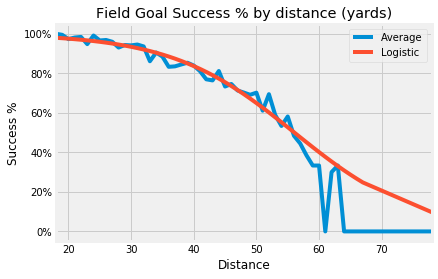

In [5]:
ax = (fg_data_gb
 .set_index('dist')[['good','logit_proba']]
 .plot(title='Field Goal Success % by distance (yards)'))
ax.set_ylabel('Success %')
ax.set_xlabel('Distance')
ax.legend(['Average','Logistic'])
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))